# CLAIM AMOUNT PREDICTIONS FOR JOHNSON INSURANCE PLC

# **1. Problem Statement** <br>

* Building a predictive model that can provide the total amount of claim by a customer in seconds

# <b>2. Hypothesis Generation</b>

**a. Policy Deductable:** The monthly contributions on the policy might have the effect on the total amount of the claim by the customer<br>

**b. Incident Hour oF The Day:** Some insurance covers regulates the times which are covered by the insurance, this might be one of the affector determing the amount to beclaims<br>

**c. Number of Vehicles involved:** The third party claims will result in higher amounts to be paid to the client, if there is no a third party the amount will be less.

**e. Property Damage:** The type of property involved will result in higher claims. <br>

**f. Policy Annual Premium:** The overall contributions by the client might determine how much they client will  claim per incident<br>

**g. Umbrella Limit:** Claim limits can determine the number of times that a client can claim with a direct influence on the total claim amount<br>

**h. incident_type :** The type of the incident will determine the saverity and the amounts of damages, which will have an impact on whether the total claim is less or high.

**i. collision_type:** Losses will play the same role as capital gains, with direct impact to the amount paid to clients

**j. Months as Customer:** - Loyal customers who have spent many years with the company and contributed more towards their insurance covers could be the ones who's claims are processed quicker

**k. Incident Severity:** The severity of the incident will determine the level of damages which will directly determine the costs and the total claim amount


**j. Authorities Contacted:** Customers who file claims without reporting their incidents to obtain the incident report and case number will determine whether claims will be paid or not. <br>

**k. Witnesses:** Claims that have witnesses can strengthen the filed claim they also guarantee that the claim will be paid and the total amount paid wont have any penalties.<br>

**l. Auto Make:** The make of the vehicle will influence the total amount of the claim to be paid to the client. <br>

**m. Auto Model:** The model of the car will also determine the amount of claim

**n. Auto Year:** The age of the car will affect the amount to be paid to the client, cars that are still 1 to few years old will result in higher claim amounts

**o. Police Report Available:** Claims that do not have the police report might end up not be paid which will result in zero amount being paid, or the amount paid could be higher or accurate without penalties if there is a report

# 3. Loading Packages and Data

In [2225]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings #to ignore warnings
warnings.filterwarnings('ignore');

# DATA
<b>It consists of the training dataset and testing dataset</b><br>

<b>Training Data:</b> Will be used to train and test the model accuracy<br>
<b>Testing Data:</b> will be used for submission<br>

In [2226]:
#creating dataframes
load_train = pd.read_csv('train.csv', na_values=["?"]) #na_values will replace "?" with NaN
load_test = pd.read_csv('test.csv', na_values=["?"])
load_submission = pd.read_csv('sample_submission.csv')

#making copies to protect the original data
train_original = load_train.copy()
test_original = load_test.copy()
submission_originial = load_submission.copy()

train = load_train
test = load_test
submission = load_submission

# 4. Understandng the Data
* We check the structure of the train and test data.
* Look at the features present in the datasets

In [2227]:
#print first five rows and columns
train.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Other,WV,Riverwood,3,NaN,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,Other,WV,Columbus,0,NaN,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


In [2228]:
#shapes of the data
f'train: {train.shape}, test: {test.shape}'

'train: (700, 37), test: (300, 36)'

The training data contains 700 observations and the test contains 300 observations

In [2229]:
#features of training set
train.columns, len(train.columns)

(Index(['Customer_ID', 'months_as_customer', 'age', 'insured_sex',
        'insured_education_level', 'insured_occupation', 'insured_hobbies',
        'insured_relationship', 'capital-gains', 'capital-loss',
        'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
        'policy_deductable', 'incident_location', 'incident_hour_of_the_day',
        'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
        'policy_annual_premium', 'umbrella_limit', 'insured_zip',
        'incident_date', 'incident_type', 'collision_type', 'incident_severity',
        'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
        'police_report_available', 'auto_make', 'auto_model', 'auto_year',
        '_c39', 'total_claim_amount'],
       dtype='object'), 37)

In [2230]:
#print the data types 
train.dtypes

Customer_ID                     object
months_as_customer               int64
age                              int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
incident_date                   object
incident_type                   object
collision_type           

In [2231]:
train.total_claim_amount

0       14386.67
1       76440.00
2       79560.00
3      121680.00
4       80640.00
         ...    
695    106400.00
696    113733.33
697     78466.67
698     97866.67
699     38400.00
Name: total_claim_amount, Length: 700, dtype: float64

<b>The data consists of the following types</b><br>

<b> Independent Categorical Data</b><br>
<b> 7-Objects:</b><br>
        
   * Customer_ID, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship          
   * policy_bind_date, policy_state, incident_location, property_damage, incident_date, incident_type, auto_model, policy_csl                 
   * collision_type, incident_severity, authorities_contacted, incident_state, incident_city, police_report_available, auto_make
    
<b> Indepentent Numerical Data</b>

<b> Nominal Data</b><br>
* number_of_vehicles_involved
* bodily_injuries

<b> 13-Int64:</b><br>
    
   * months_as_customer, age, capital-gains, capital-loss, policy_number, policy_deductable, incident_hour_of_the_day
   * policy_annual_premium, umbrella_limit, insured_zip, witnesses, auto_year
   
<b> 3-Float </b><br>
   * _c39
   * policy_annual_premium

<b> Dependent/Target Variable</b><br>
<b> 1- float </b><br>
   * total_claim_amount (target variable)

<b>Target Variable</b><br>
* total_claim_amount (target variable)

# 5. Exploratory Data Analysis

# 5.1 Univariables Analysis

**We look at the analysis of each variable:**
* Categorical: Frequency table, Percentage distribution and Bar-plot
* Numerical: Probability density plot

* **Target Variable: total_claim_amount**

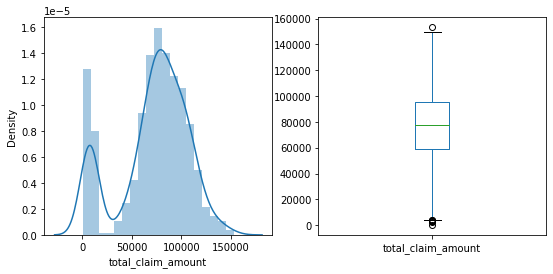

In [2232]:
#density distribution of total_claim_amount
plt.figure(1)

plt.subplot(121)
sns.distplot(train.total_claim_amount); #density distribution

plt.subplot(122)
train.total_claim_amount.plot.box(figsize = (9, 4))
plt.show()

* The train.total_claim_amount does not have any extreme values, the distribution is normal, majority of the claims where paid between 50k to 150k. 

* **policy_annual_premium**

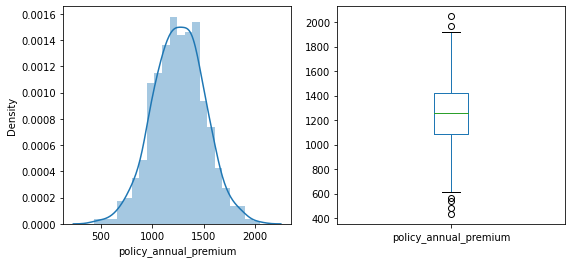

In [2233]:
# distribution of policy_annual_premium
plt.figure(1)
plt.subplot(121)
sns.distplot(train.policy_annual_premium)
plt.subplot(122)
train.policy_annual_premium.plot.box(figsize = (9, 4))
plt.show()

* **months_as_customer and age**

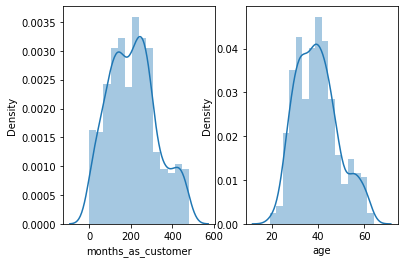

In [2234]:
# distribution of months_as_customer
plt.figure(1)
plt.subplot(121)
sns.distplot(train.months_as_customer)
plt.subplot(122)
sns.distplot(train.age)
plt.show()

* **capital-gains**

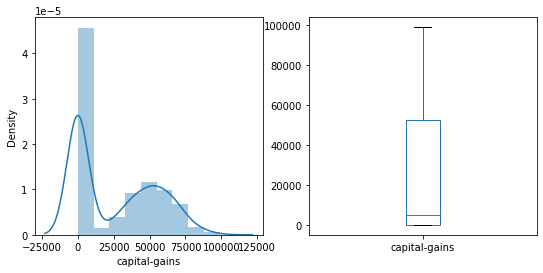

In [2235]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['capital-gains'])
plt.subplot(122)
train['capital-gains'].plot.box(figsize = (9, 4))
plt.show()

In [2236]:
train['capital-gains'].head()

0    51400
1        0
2        0
3        0
4    60200
Name: capital-gains, dtype: int64

* **capital-loss**

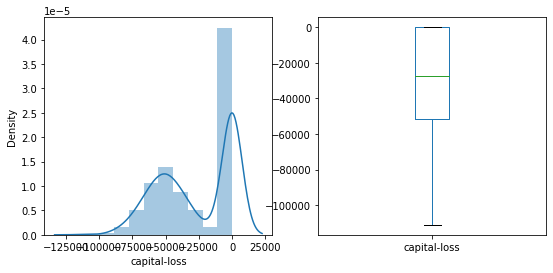

In [2237]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['capital-loss'])
plt.subplot(122)
train['capital-loss'].plot.box(figsize = (9, 4))
plt.show()

* **policy_deductable and incident_hour_of_the_day**

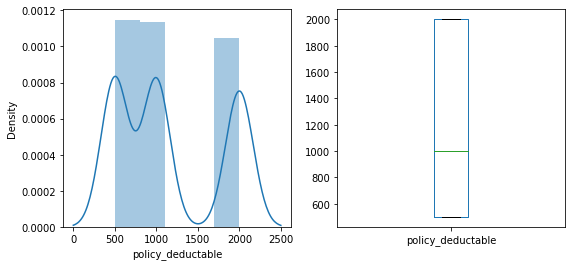

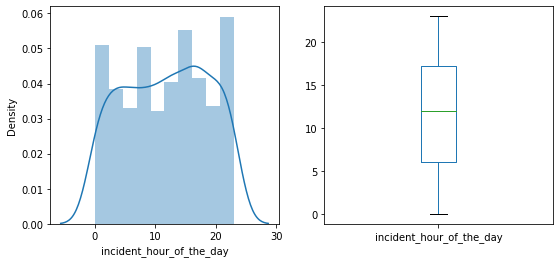

In [2238]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['policy_deductable'])
plt.subplot(122)
train['policy_deductable'].plot.box(figsize = (9, 4))
plt.show()

plt.figure(2)
plt.subplot(121)
sns.distplot(train.incident_hour_of_the_day)
plt.subplot(122)
train['incident_hour_of_the_day'].plot.box(figsize = (9, 4))
plt.show()

* **number_of_vehicles_involved**

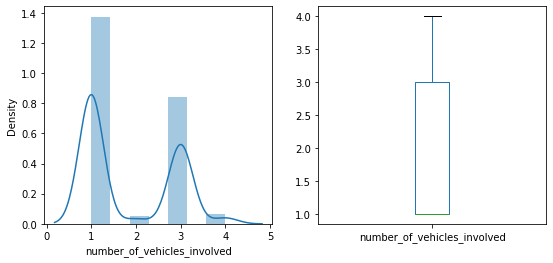

In [2239]:
plt.figure(2)
plt.subplot(121)
sns.distplot(train.number_of_vehicles_involved)
plt.subplot(122)
train['number_of_vehicles_involved'].plot.box(figsize = (9, 4))
plt.show()

* **bodily_injuries** 
* **number_of_vehicles_involved, witnesses**
* **authorities_contacted**

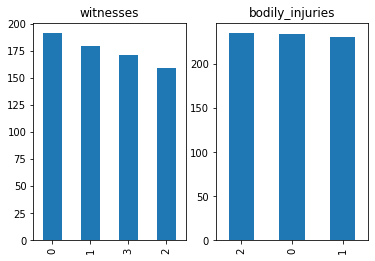

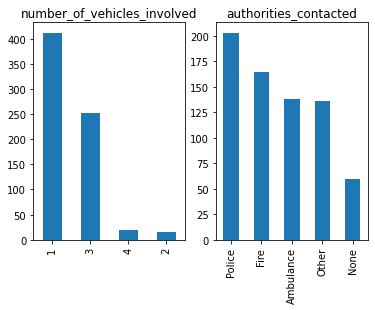

In [2240]:
#bar plot
plt.figure(1)
plt.subplot(121)
train['witnesses'].value_counts().plot.bar(title = 'witnesses');
plt.subplot(122)
#bar plot 
train.bodily_injuries.value_counts().plot.bar(title = 'bodily_injuries')
plt.figure(2)
plt.subplot(121)
train.number_of_vehicles_involved.value_counts().plot.bar(title = 'number_of_vehicles_involved')
plt.subplot(122)
train.authorities_contacted.value_counts().plot.bar(title = 'authorities_contacted')
plt.show()

* **police_report_available**
* **police_report_available**
* **incident_severity**
* **collision_type**

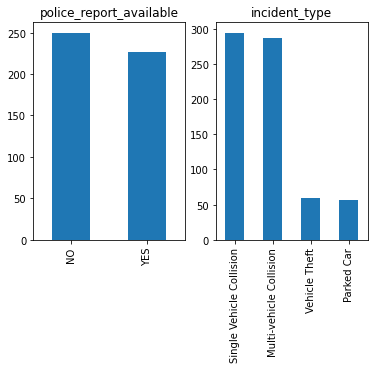

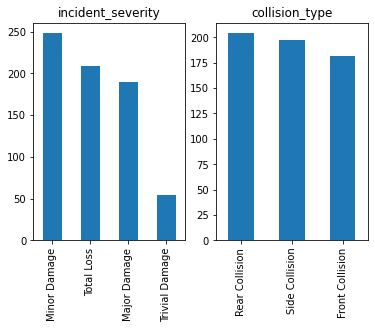

In [2241]:
#bar plot
plt.figure(1)
plt.subplot(121)
train['police_report_available'].value_counts().plot.bar(title = 'police_report_available');
plt.subplot(122)
#bar plot 
train.incident_type.value_counts().plot.bar(title = 'incident_type')

plt.figure(2)
plt.subplot(121)
train['incident_severity'].value_counts().plot.bar(title = 'incident_severity');
plt.subplot(122)
#bar plot 
train.collision_type.value_counts().plot.bar(title = 'collision_type')
plt.show()

* **auto_make**
* **insured_sex**
* **insured_relationship**
* **insured_education_level**

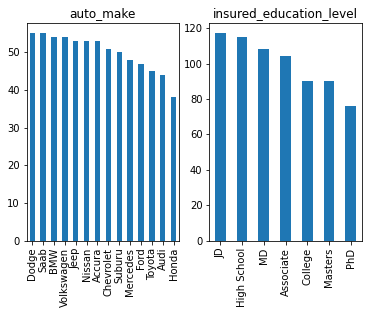

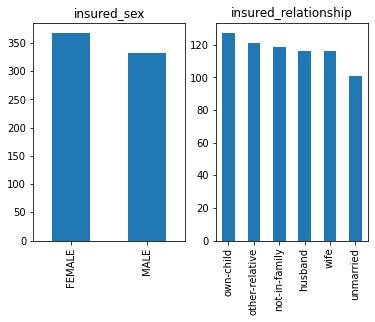

In [2242]:
#bar plot
plt.figure(1)
plt.subplot(121)
#bar plot 
train['auto_make'].value_counts().plot.bar(title = 'auto_make')
plt.subplot(122)
train['insured_education_level'].value_counts().plot.bar(title = 'insured_education_level')
plt.show()

plt.figure(2)
plt.subplot(121)
train.insured_sex.value_counts().plot.bar(title = 'insured_sex')
plt.subplot(122)
train.insured_relationship.value_counts().plot.bar(title = 'insured_relationship')

plt.show()

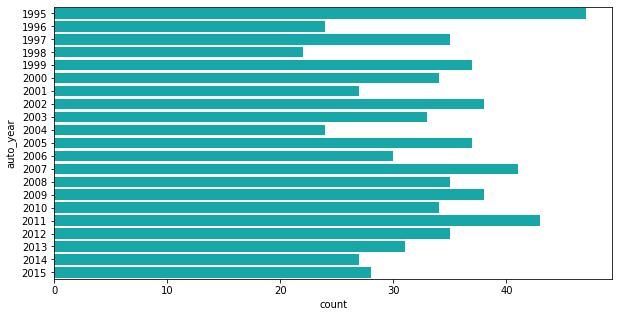

In [2243]:
#visualize auto year
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="auto_year", data=train, color="c");

# 5.2 Bivariable Analysis

**Analysis will be based on Independent variables and target variable to see the relationship between them**

* **Insured Sex vs Total Claim Amount**

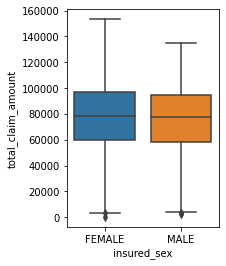

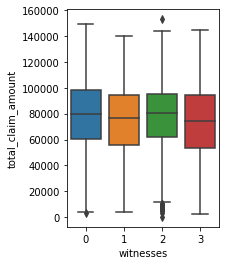

In [2244]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(x = 'insured_sex', y = 'total_claim_amount', data = train)
plt.show()

plt.figure(2)
plt.subplot(121)
sns.boxplot(x = 'witnesses', y = 'total_claim_amount', data = train);
plt.show()

* **visualize insured_sex**
* **total_claim_amount**
* **insured_education_level**

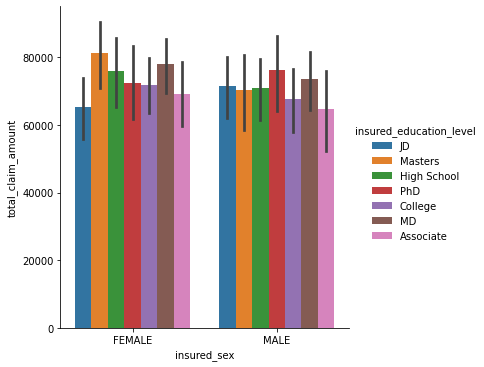

In [2245]:
#visualize insured_sex
#total_claim_amount
#insured_education_level
sns.catplot(x="insured_sex", y="total_claim_amount", hue="insured_education_level", kind="bar", data=train);

* **umbrella_limit**
* **total_claim_amount**

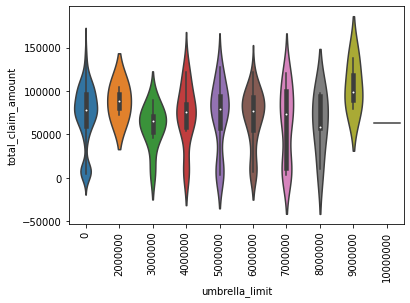

In [2246]:
#Using violin to plot the item types as well
plt.xticks(rotation = 90)
sns.violinplot(x = train.umbrella_limit, y= train.total_claim_amount);

* **incident_type**
* **age**
* **policy_state**

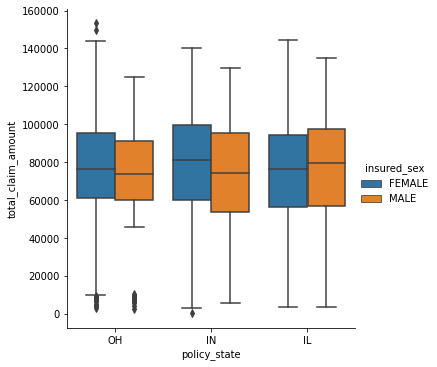

In [2247]:
#visuallize with Item_Type and Outlet_Size
sns.catplot(x="policy_state", y="total_claim_amount", hue="insured_sex",  kind="box", data= train);

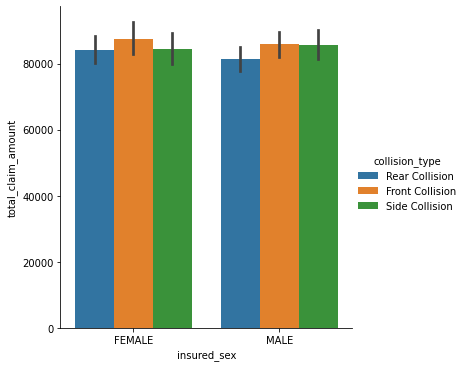

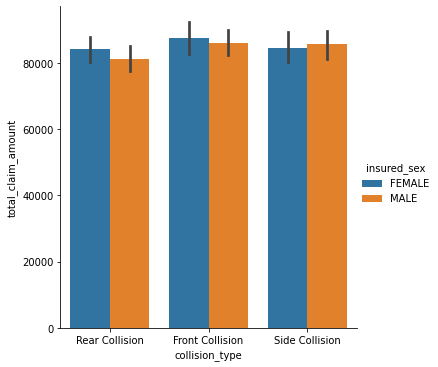

In [2248]:
#collision type, total_claim_amount, gender
sns.catplot(x="insured_sex", y="total_claim_amount", hue="collision_type", kind="bar", data=train);
sns.catplot(x="collision_type", y="total_claim_amount", hue="insured_sex", kind="bar", data=train);

# 6. Hanlding Missing Values and Outliers

In [2249]:
#sorting missing values columns and filtering 0 missing value cols
missing_value_cols = train.isnull().sum()
missing_value_cols = missing_value_cols[missing_value_cols != 0]
missing_value_cols.sort_values(ascending = False)

_c39                       700
property_damage            255
police_report_available    224
collision_type             117
dtype: int64

In [2250]:
#Replace missing values with the mode for categorical and or mean/median for numerical
#train dataset
train['property_damage'].fillna(train['property_damage'].mode()[0], inplace = True)
train['police_report_available'].fillna(train['police_report_available'].mode()[0], inplace = True)
train['collision_type'].fillna(train['collision_type'].mode()[0], inplace = True)

#test dataset
#Replace missing values with the mode for categorical and or mean/median for numerical
test['property_damage'].fillna(test['property_damage'].mode()[0], inplace = True)
test['police_report_available'].fillna(test['police_report_available'].mode()[0], inplace = True)
test['collision_type'].fillna(test['collision_type'].mode()[0], inplace = True)

In [2251]:
#sorting missing values columns and filtering 0 missing value cols
missing_value_cols = train.isnull().sum()
missing_value_cols = missing_value_cols[missing_value_cols != 0]
missing_value_cols.sort_values(ascending = False)

_c39    700
dtype: int64

In [2252]:
#drop the _c39 column since it consists of nan only
train = train.drop(['_c39'], axis = 'columns')
test = test.drop(['_c39'], axis = 'columns')

In [2253]:
#property damage
train.property_damage.value_counts()

NO     479
YES    221
Name: property_damage, dtype: int64

**Correlations on Data**

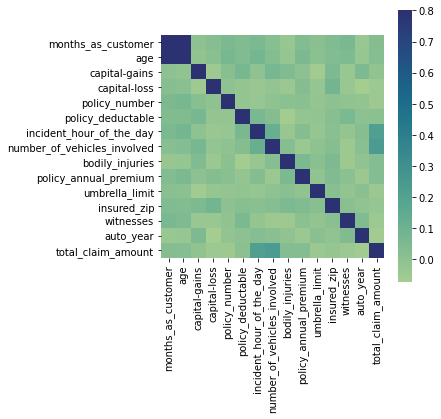

In [2254]:
#view Correlations
matrix = train.corr()
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(matrix, vmax = 0.8, square = True, cmap = 'crest');

# 7. Pre-Processing Data<br>

**Transoform The Following Data**

* police_report_available:
* property_damage:
* collision_type:
* policy_state:
* insured_sex:
* insured_education_level:
* policy_csl

# 7.1 One Hot Encoding 

In [2255]:
#One Hot Encoding
from sklearn.preprocessing import LabelEncoder
#instantiate LabelEncoder to create le object
le = LabelEncoder()

#train set
train['insured_education_level'] = le.fit_transform(train['insured_education_level'])
#train['incident_severity'] = le.fit_transform(train['incident_severity'])
train['insured_sex'] = le.fit_transform(train['insured_sex'])
train['insured_occupation'] = le.fit_transform(train['insured_occupation'])
train['insured_hobbies'] = le.fit_transform(train['insured_hobbies'])
train['insured_relationship'] = le.fit_transform(train['insured_relationship'])
#train['policy_state'] = le.fit_transform(train['policy_state'])
train['property_damage'] = le.fit_transform(train['property_damage'])
#train['incident_type'] = le.fit_transform(train['incident_type'])
train['incident_state'] = le.fit_transform(train['incident_state'])
train['incident_city'] = le.fit_transform(train['incident_city'])
train['witnesses'] = le.fit_transform(train['witnesses'])
train['police_report_available'] = le.fit_transform(train['police_report_available'])
train['auto_make'] = le.fit_transform(train['auto_make'])
train['auto_model'] = le.fit_transform(train['auto_model'])
train['authorities_contacted'] = le.fit_transform(train['authorities_contacted'])

train['collision_type'] = le.fit_transform(train['collision_type'])

#test set
test['insured_education_level'] = le.fit_transform(test['insured_education_level'])
#test['incident_severity'] = le.fit_transform(test['incident_severity'])
test['insured_sex'] = le.fit_transform(test['insured_sex'])
test['insured_occupation'] = le.fit_transform(test['insured_occupation'])
test['insured_hobbies'] = le.fit_transform(test['insured_hobbies'])
test['insured_relationship'] = le.fit_transform(test['insured_relationship'])
#test['policy_state'] = le.fit_transform(test['policy_state'])
test['property_damage'] = le.fit_transform(test['property_damage'])
#test['incident_type'] = le.fit_transform(test['incident_type'])
test['incident_city'] = le.fit_transform(test['incident_city'])
test['witnesses'] = le.fit_transform(test['witnesses'])
test['police_report_available'] = le.fit_transform(test['police_report_available'])
test['auto_model'] = le.fit_transform(test['auto_model'])
test['authorities_contacted'] = le.fit_transform(test['authorities_contacted'])
test['auto_make'] = le.fit_transform(test['auto_make'])
test['collision_type'] = le.fit_transform(test['collision_type'])
test['incident_state'] = le.fit_transform(test['incident_state'])

In [2256]:
#CHECK POINT TO COPY THE FILES TO USE IN OTHER DIFFIRENT MODELS
train_special_copy = train.copy()
test_special_copy = test.copy()

In [2257]:
#convert string float fractions in policy_csl into floats
df = train.copy()
df[["numerator", "denominator"]] = df["policy_csl"].str.split("/", expand=True)

#add to train and test data
train["policy_csl_float"] = df["numerator"].astype(float) / df["denominator"].astype(float)
test["policy_csl_float"] = df["numerator"].astype(float) / df["denominator"].astype(float)

In [2258]:
print(test.policy_csl_float.head(), train.policy_csl_float[0])

0    0.500000
1    0.500000
2    0.500000
3    0.500000
4    0.333333
Name: policy_csl_float, dtype: float64 0.5


In [2259]:
train.authorities_contacted.unique()

array([4, 1, 3, 0, 2])

In [2260]:
train.collision_type.unique()

array([1, 0, 2])

In [2261]:
train.incident_city.unique()

array([0, 1, 5, 6, 2, 4, 3])

In [2262]:
test.policy_csl.unique(), train.policy_csl_float.unique()

(array(['250/500', '500/1000', '100/300'], dtype=object),
 array([0.5       , 0.33333333]))

# 7.2 Treating Extreme Values/Outliers

# 7.3 Feature Engineering

In [2263]:
#calculate the years of the auto_year or car
from datetime import datetime
current_date_time = datetime.now()

#replace the YYYY date with number of years
train['auto_age'] = (current_date_time.year - train['auto_year'])
test['auto_age'] = (current_date_time.year - test['auto_year'])

#add the years_as_customer
train['years_as_customer'] = train.months_as_customer//12
test['years_as_customer'] = test.months_as_customer//12
#add the months_out_of_12_as_customer
train['no_months_as_customer'] = train.months_as_customer%12
test['no_months_as_customer'] = test.months_as_customer%12

In [2264]:
train.auto_year[0], train.auto_age[0], train.months_as_customer[0]

(2013, 8, 239)

In [2265]:
#add policy period by the time of the incident
#use copy df to create it and add to the original df
dftr = train.copy()
dfte = test.copy()


dftr['incident_date'] = pd.to_datetime(dftr['incident_date'])
dftr['policy_bind_date'] = pd.to_datetime(dftr['policy_bind_date'])

dfte['incident_date'] = pd.to_datetime(dfte['incident_date'])
dfte['policy_bind_date'] = pd.to_datetime(dfte['policy_bind_date'])

train['policy_period'] = (dftr.incident_date - dftr.policy_bind_date)
test['policy_period'] = (dfte.incident_date - dfte.policy_bind_date)

In [2266]:
#convert string float fractions in policy_csl into floats
df = train.copy()
df[["numerator", "denominator"]] = df["policy_csl"].str.split("/", expand=True)

#add to train and test data
train["policy_csl_float"] = df["numerator"].astype(float) / df["denominator"].astype(float)
test["policy_csl_float"] = df["numerator"].astype(float) / df["denominator"].astype(float)

In [2267]:
train.no_months_as_customer.unique()

array([11,  0,  8,  5,  6,  2,  4,  3, 10,  1,  7,  9], dtype=int64)

In [2268]:
#Convert days in policy_period from dtype timedelta to int64
train['policy_period'] = train['policy_period'].dt.days
test['policy_period'] = test['policy_period'].dt.days

In [2269]:
train.policy_period.head()

0     464
1    3359
2    4811
3     849
4    4019
Name: policy_period, dtype: int64

In [2270]:
#special copy
train_file  = train.copy()
test_file = test.copy()

**Drop Unnecessary Features**

In [2271]:
#auto_year, months_as_customer, incidnet_location
#train
train = train.drop('months_as_customer', axis = 1)
train = train.drop('auto_year', axis = 1)
train = train.drop('incident_location', axis = 1)
train = train.drop('policy_csl', axis = 1)
#test
test = test.drop('months_as_customer', axis = 1)
test = test.drop('auto_year', axis = 1)
test = test.drop('incident_location', axis = 1)
test = test.drop('policy_csl', axis = 1)

#customer_ID, policy_number, insured_zip,policy_bind_date, incident_date
#train
train = train.drop('Customer_ID', axis = 1)
train = train.drop('policy_number', axis =1)
train = train.drop('insured_zip', axis =1)
train = train.drop('policy_bind_date', axis = 1)
train = train.drop('incident_date', axis = 1)
#test
test = test.drop('Customer_ID', axis = 1)
test = test.drop('policy_number', axis =1)
test = test.drop('insured_zip', axis =1)
test = test.drop('policy_bind_date', axis = 1)
test = test.drop('incident_date', axis = 1)

# Get Metrix

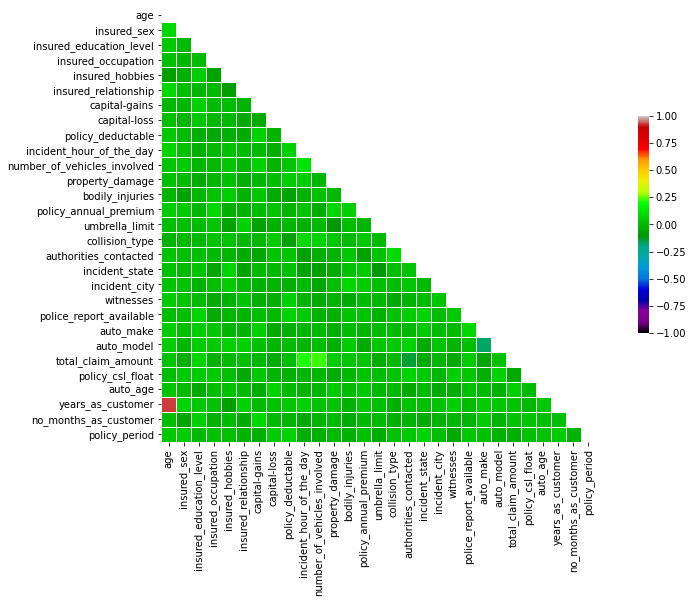

In [2272]:
#Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

# Generate a custom diverging colormap
cmap = 'nipy_spectral'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# 8. Building The Model

# Scaling
* Standardization
  

In [2273]:
#drop target variable: total_claim_amount and assign it to y
X = train.drop('total_claim_amount', axis = 1)
y = train.total_claim_amount

train_cp = train.copy()
test_cp = test.copy()

In [2274]:
#Creating Dummies
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [2275]:
#CHECK POINT
test.shape, X.shape

((300, 39), (700, 39))

In [2276]:
#Normalizing the Dataset
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X.iloc[:,1:-1] = ss.fit_transform(X.iloc[:,1:-1])
test.iloc[:,1:-1] = ss.fit_transform(test.iloc[:,1:-1])
train.iloc[:,1:-1] = ss.fit_transform(train.iloc[:,1:-1])

In [2277]:
#split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Model_0:
**Linear Regression**

In [2278]:
from sklearn.linear_model import LinearRegression

#lineare regression object
regress_0 = LinearRegression()
#fit the model
regress_0.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2279]:
#predictions
y_pred_0 = regress_0.predict(X_test)

In [2280]:
#import lib and mod
from math import sqrt
from sklearn.metrics import mean_squared_error


mse = np.square(np.subtract(y_test, y_pred_0)).mean()
print(sqrt(mse))
rmse = sqrt(mean_squared_error(y_test, y_pred_0))
print(rmse)

20613.29004194537
20613.29004194537


In [2281]:
claim_pred_0 = regress_0.predict(test)

**Submission for model 0**

In [2282]:
#Adds total_claim_amout column and fill it
submission = pd.read_csv('sample_submission.csv')

submission['total_claim_amount'] = claim_pred_0
#Adds Customer_ID and fill it
submission['Customer_ID'] = test_original['Customer_ID']

#Convert submission to .csv file format
submission.to_csv('regress_0.csv', index = False)

# Model_1:
**Using GridSearch**

In [2283]:
#import the libraries
from sklearn.model_selection import GridSearchCV

#instantiate the model
model = LinearRegression()
#set parameters
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)

grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [2284]:
#predict the X_test
y_pred_1 = grid.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred_1))

print(rmse)

20615.162509165075


In [2285]:
#make predictions
claim_pred_1 = grid.predict(test)

In [2286]:
#Adds total_claim_amout column and fill it
submission = pd.read_csv('sample_submission.csv')

submission['total_claim_amount'] = claim_pred_1
#Adds Customer_ID and fill it
submission['Customer_ID'] = test_original['Customer_ID']

#Convert submission to .csv file format
submission.to_csv('regress_1.csv', index = False)

# Model_2:
**Using GradientBoosting**

In [2287]:
from sklearn.ensemble import GradientBoostingRegressor #For Regression

regress_2 = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1)
regress_2.fit(X_train, y_train);

In [2288]:
#prediction with GB
y_pred_2 = regress_2.predict(X_test)

#root mean square error
rmse = sqrt(mean_squared_error(y_test, y_pred_2))
print(rmse)

21794.972097970927


In [2290]:
MSE = np.square(np.subtract(y_test,y_pred_2)).mean()
sqrt(MSE)

21794.97209797093

In [2291]:
#make a prediction
claim_pred_2 = regress_2.predict(test)

In [2292]:
#Adds total_claim_amout column and fill it
submission = pd.read_csv('sample_submission.csv')

submission['total_claim_amount'] = claim_pred_2
#Adds Customer_ID and fill it
submission['Customer_ID'] = test_original['Customer_ID']

#Convert submission to .csv file format
submission.to_csv('regress_2.csv', index = False)

# 9 Advanced Models

<b> 9.1. LogisticRegression: TransformedTargetRegressor</b>

In [2294]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer


transformer = QuantileTransformer(output_distribution = 'normal')
regressor = LinearRegression()
regression_model_3 = TransformedTargetRegressor(regressor = regressor, transformer = transformer)

#Model3 with transformed target variable 
regression_model_3.fit(X_train, y_train);

In [2295]:
#predict and measure RMSE
y_pred_3 = regression_model_3.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred_3))
rmse

20516.278319624307

9.2 <b> LinearRegression with Standard scaler

In [2296]:
from sklearn.preprocessing import StandardScaler

#instantiate the scaler
scale = StandardScaler()

#scale X_train and X_test the data
scaled_X_train = scale.fit_transform(X_train)
scaled_X_test = scale.fit_transform(X_test)
#create the model object
regression_model_4 = LinearRegression()

#fit the model
regression_model_4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2173]:
#predict the X_test
y_pred_4 = grid.predict(X_test)
#RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_4))
print(rmse)

20615.162509165075


#  K-Nearest Neighbors Algorithm for Regression

<b> Preprocessing – Scaling the features

In [ ]:
# fit transform incident_severity and type to run this model
#drop target variable: total_claim_amount and assign it to y
X = train_cp.drop('total_claim_amount', axis = 1)
y = train.total_claim_amount

#train_ = train_cp.copy()
test_ = test_cp.copy()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


#Preprocessing – Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 


rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred = model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#Implementing GridsearchCV to decide on the value of k, to avoid plotting the elbow curve

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

knn_model = GridSearchCV(knn, params, cv=5)
knn_model.fit(x_train,y_train)
knn_model.best_params_

In [ ]:
#printing the same 
knn_model_pred = knn_model.predict(x_test)

rmse = sqrt(mean_squared_error(y_test,knn_model_pred))
rmse

# Submission for KNN Regression

In [ ]:
#scale the test data
test_scaled = scaler.fit_transform(test_)
test_scaled_fit = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
knn_claim_predict = knn_model.predict(test_scaled_fit)

# XGBoostNeighbors

In [2174]:
#drop target variable: total_claim_amount and assign it to y
X = train_cp.drop('total_claim_amount', axis = 1)
y = train.total_claim_amount

#train_ = train_cp.copy()
test_ = test_cp.copy()
train_ = train_cp.copy()

In [2175]:
#Creating Dummies
X= pd.get_dummies(X)
train = pd.get_dummies(train_)
test = pd.get_dummies(test_)

In [2176]:
#split the normalized dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#evaluate an xgboost regression model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE


#define model evaluation method
xgb_r = XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)

xgb_r.fit(x_train, y_train);

[04:47:42] WARNING: d:\build\xgboost\xgboost-1.3.3.git\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [2177]:
# Predict the model
xgb_pred = xgb_r.predict(x_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, xgb_pred))

rmse

0.6333691158598289

# Gradient Boosting Fine Tuning

# ENSEMBLE TECHNIQUES

In [2178]:
from sklearn.ensemble import GradientBoostingRegressor #For Regression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
#evaluate an xgboost regression model
from xgboost import XGBRegressor


#define model evaluation method
model1 = DecisionTreeRegressor()
model2 = XGBRegressor()
xgb_r = XGBRegressor(objective ='reg:linear', n_estimators = 400, seed = 122)
grid_GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1)   

In [2179]:
#fit the model   
model1.fit(x_train,y_train) 
model2.fit(x_train, y_train)
xgb_r.fit(x_train, y_train)
grid_GBR.fit(x_train, y_train);

[04:47:49] WARNING: d:\build\xgboost\xgboost-1.3.3.git\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [2180]:
#predict the x_test dataset
pred1 = model1.predict(x_test) 
pred2 = model2.predict(x_test)
pred3 = xgb_r.predict(x_test)
pred4 = grid_GBR.predict(x_test)
#creates an empty np.array
final_pred = np.array([]) 

In [2181]:
#import median and take the median of the models
from statistics import median
for i in range(0,len(x_test)):
     final_pred = np.append(final_pred, median([pred1[i], pred2[i], pred3[i], pred4[i]]))
        

#Combined RMSE 
rmse = sqrt(mean_squared_error(y_test,final_pred))
print('Combined RMSE: ', rmse)

Combined RMSE:  0.6129522204372757


In [2182]:
sqrt(mean_squared_error(y_test,pred1))

0.7965527692488795

In [2183]:
sqrt(mean_squared_error(y_test,pred2))

0.6333691158598289

In [2184]:
sqrt(mean_squared_error(y_test,pred3))

0.6333690871661712

In [2185]:
sqrt(mean_squared_error(y_test,pred4))

0.624658388679921

# Final Prediction of test data with a better model

In [2186]:
claim_xgb_pred = xgb_r.predict(test)
claim_model1 = model1.predict(test)
claim_model2 = model2.predict(test)
claim_xgb_r = xgb_r.predict(test)
claim_grid_GRB = grid_GBR.predict(test)

# Submission of a better model

In [2187]:
#Adds total_claim_amout column and fill it
submission = pd.read_csv('sample_submission.csv')

submission['total_claim_amount'] = claim_xgb_pred
#Adds Customer_ID and fill it
submission['Customer_ID'] = test_original['Customer_ID']

#Convert submission to .csv file format
submission.to_csv('xgb_pred.csv', index = False)

In [2188]:
submission['total_claim_amount'] = claim_model1
#Adds Customer_ID and fill it
submission['Customer_ID'] = test_original['Customer_ID']

#Convert submission to .csv file format
submission.to_csv('model1_pred_.csv', index = False)

In [2189]:
submission['total_claim_amount'] = claim_model2
#Adds Customer_ID and fill it
submission['Customer_ID'] = test_original['Customer_ID']

#Convert submission to .csv file format
submission.to_csv('mode21_pred_.csv', index = False)

In [2190]:
submission['total_claim_amount'] = claim_xgb_r
#Adds Customer_ID and fill it
submission['Customer_ID'] = test_original['Customer_ID']

#Convert submission to .csv file format
submission.to_csv('claim_xgb_r.csv', index = False)

In [2191]:
submission['total_claim_amount'] = claim_grid_GRB
#Adds Customer_ID and fill it
submission['Customer_ID'] = test_original['Customer_ID']

#Convert submission to .csv file format
submission.to_csv('claim_grid_GRB.csv', index = False)

# SPECIAL DATA FOR EXPERIMENTING

In [2192]:
import warnings #to ignore warnings
warnings.filterwarnings('ignore');

In [2193]:
train = train_cp.copy()
test = test_cp.copy()

#Normalizing the Dataset
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X.iloc[:,1:-1] = ss.fit_transform(X.iloc[:,1:-1])
test.iloc[:,1:-1] = ss.fit_transform(test.iloc[:,1:-1])
train.iloc[:,1:-1] = ss.fit_transform(train.iloc[:,1:-1])

In [2194]:
#drop target variable: total_claim_amount and assign it to y
X = train_cp.drop('total_claim_amount', axis = 1)
y = train_cp.total_claim_amount

#Creating Dummies
X= pd.get_dummies(X)
train = pd.get_dummies(train_)
test = pd.get_dummies(test_)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [2195]:
X.shape, test.shape

((700, 39), (300, 39))

In [2196]:
from sklearn.ensemble import GradientBoostingRegressor #For Regression

regres = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1)
regres.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [2197]:
#prediction with GB
regres_pre= regres.predict(x_test)

#root mean square error
rmse = sqrt(mean_squared_error(y_test, regres_pre))
rmse

21794.972097970924

In [2198]:
from sklearn import ensemble
params = {'n_estimators': 3, 'max_depth': 3, 'learning_rate': 1, 'criterion': 'friedman_mse'}
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [2199]:
#prediction with GB
gbr_pred= gradient_boosting_regressor.predict(x_test)

#root mean square error
rmse = sqrt(mean_squared_error(y_test, gbr_pred))
rmse

21427.126634973978

In [2200]:
claim_gbr_pred = gradient_boosting_regressor.predict(test)

In [2201]:
#Adds total_claim_amout column and fill it
submission = pd.read_csv('sample_submission.csv')

submission['total_claim_amount'] = claim_gbr_pred
#Adds Customer_ID and fill it
submission['Customer_ID'] = test_original['Customer_ID']

#Convert submission to .csv file format
submission.to_csv('gbr_pred_ense.csv', index = False)

# AdaBoostRegressor

In [2202]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=13)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

#gradient boosting classifier
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train);

In [2203]:
#adaboost classifier
reg1=ensemble.AdaBoostRegressor()
reg1.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [2204]:
#prediction with GB
reg_pred = reg.predict(x_test)
reg1_pred = reg1.predict(x_test)

#root mean square error
rmse = sqrt(mean_squared_error(y_test, reg_pred))
rmse1 = sqrt(mean_squared_error(y_test, reg1_pred))
rmse, rmse1

(20692.12083215479, 20405.571309547096)

In [2205]:
claim_reg_ada = reg.predict(test)

In [2206]:
#Adds total_claim_amout column and fill it
submission = pd.read_csv('sample_submission.csv')

submission['total_claim_amount'] = claim_reg_ada
#Adds Customer_ID and fill it
submission['Customer_ID'] = test_original['Customer_ID']

#Convert submission to .csv file format
submission.to_csv('reg_ada_pred_ense.csv', index = False)

# Modifications of  Data PreProcessing

**Trasforemed Gradient Boost**

1. <b>Import the libraries and load data</b>
* **Loading Data**

In [2207]:
#CHECK POINT TO COPY THE FILES TO USE IN OTHER DIFFIRENT MODELS
train_ = train_cp.copy()
train_ = test_cp.copy()

In [2208]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from datetime import time

In [2209]:
train_.head()

,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_state,policy_deductable,...,incident_city,witnesses,police_report_available,auto_make,auto_model,policy_csl_float,auto_age,years_as_customer,no_months_as_customer,policy_period
0,26,0,6,4,16,1,31500,0,IL,2000,...,6,3,0,1,5,0.500000,18,0,5,182
1,33,0,2,3,8,0,61600,0,IL,1000,...,5,3,1,9,29,0.500000,15,13,4,2172
2,51,0,4,2,15,0,0,-61000,IN,1000,...,5,3,0,11,21,0.500000,14,32,1,8979
3,57,1,1,0,17,4,42700,-64900,IN,2000,...,4,0,0,7,36,0.500000,9,37,2,8102
4,29,0,2,6,18,1,0,-29900,OH,1000,...,0,0,1,2,0,0.333333,16,7,0,4327


0. **Preprocessing**

In [2210]:
train_.shape, test_.shape

((300, 31), (300, 31))

In [2211]:
#drop target variable: total_claim_amount and assign it to y
x = X
y = y

In [2212]:
x.shape, test_.shape, y.shape

((700, 39), (300, 31), (700,))

2. **Data Tranformation**

In [2213]:
#Creating Dummies
x= pd.get_dummies(x)
train_ = pd.get_dummies(train_)
test_ = pd.get_dummies(test_)

In [2214]:
x.shape, test_.shape

((700, 39), (300, 39))

3. **Splitting the data and Training the model**

In [2215]:
#split the train dataset before training
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=13)

In [2216]:
#gradient boosting classifier
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg_ = ensemble.GradientBoostingRegressor(**params)
reg_.fit(x_train, y_train);

In [2217]:
#adaboost classifier
reg_1=ensemble.AdaBoostRegressor()
reg_1.fit(x_train, y_train);

In [2218]:
#prediction with GB and AB
reg_pred = reg_.predict(x_test)
reg1_pred = reg_1.predict(x_test)

#root mean square error
rmse = sqrt(mean_squared_error(y_test, reg_pred))
rmse1 = sqrt(mean_squared_error(y_test,reg1_pred))
rmse, rmse1

(20728.943564280817, 20440.628758243238)

# Solution Submission

In [2219]:
reg_pred = reg_.predict(test_)
#Adds total_claim_amout column and fill it
submission = pd.read_csv('sample_submission.csv')

submission['total_claim_amount'] = reg_pred
#Adds Customer_ID and fill it
submission['Customer_ID'] = test_original['Customer_ID']

#Convert submission to .csv file format
submission.to_csv('reg_pred.csv', index = False)

# Final Complex Linear Regression Model

In [2220]:
#split test and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# import necessary libraries
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot


# 1. evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)

In [2221]:
# 2. plot the dataset and the model's line of best fit
def best_fit(X, y, model):
    #fits the model to the training data
    model.fit(X, y)
    #return the fitted model
    return model

In [2222]:
# 3. define the model, evalutate and fit it
model = LinearRegression()
# evaluate model
results = evaluate_model(X_test, y_test, model)
#predict results
print(f'Mean MAE:{mean(results)}, STD: {std(results)}')
# fit the model
fitted_model = best_fit(X_train, y_train, model)

Mean MAE:19555.81957794868, STD: 4002.9088630939027


In [2223]:
#predict the target
pred_results = fitted_model.predict(X_test)
#RMSE
rmse = (sqrt(mean_squared_error(y_test, pred_results)))
rmse

20615.16250916417